In [1]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.manifold import TSNE
import keras
from keras.models import Sequential
from keras.layers import Dense


Using TensorFlow backend.


In [2]:
dataframe = pd.read_csv("car.data.csv")


In [3]:
dataframe.head(10)

,COST,MAINTAIN COST,DOORS,PERSON,BOOT SPACE,SAFTEY,VALUE
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
5,vhigh,vhigh,2,2,med,high,unacc
6,vhigh,vhigh,2,2,big,low,unacc
7,vhigh,vhigh,2,2,big,med,unacc
8,vhigh,vhigh,2,2,big,high,unacc
9,vhigh,vhigh,2,4,small,low,unacc


In [4]:

df_label = dataframe['VALUE']
df_features = dataframe.drop('VALUE', 1)



print(df_label.head())
df_features.head()

0    unacc
1    unacc
2    unacc
3    unacc
4    unacc
Name: VALUE, dtype: object


,COST,MAINTAIN COST,DOORS,PERSON,BOOT SPACE,SAFTEY
0,vhigh,vhigh,2,2,small,low
1,vhigh,vhigh,2,2,small,med
2,vhigh,vhigh,2,2,small,high
3,vhigh,vhigh,2,2,med,low
4,vhigh,vhigh,2,2,med,med


In [5]:
#assigning a single int. value to each parameters.

df_label.replace('unacc', 1, inplace=True)
df_label.replace('acc', 2, inplace=True)
df_label.replace('good', 3, inplace=True)
df_label.replace('vgood', 4, inplace=True)



    
df_features['COST'].replace('vhigh', 4, inplace=True)
df_features['COST'].replace('high', 3, inplace=True)
df_features['COST'].replace('med', 2, inplace=True)
df_features['COST'].replace('low', 1, inplace=True)


df_features['MAINTAIN COST'].replace('vhigh', 4, inplace=True)
df_features['MAINTAIN COST'].replace('high', 3, inplace=True)
df_features['MAINTAIN COST'].replace('med', 2, inplace=True)
df_features['MAINTAIN COST'].replace('low', 1, inplace=True)




df_features['DOORS'].replace('5more', 4, inplace=True)
df_features['DOORS'].replace('2',  1, inplace=True)
df_features['DOORS'].replace('3',  2, inplace=True)
df_features['DOORS'].replace('4',  3, inplace=True)




df_features['PERSON'].replace('2',  1, inplace=True)
df_features['PERSON'].replace('4',  2, inplace=True)
df_features['PERSON'].replace('more',  3, inplace=True)




df_features['BOOT SPACE'].replace('small', 1, inplace=True)
df_features['BOOT SPACE'].replace('med', 2, inplace=True)
df_features['BOOT SPACE'].replace('big', 3, inplace=True)


df_features['SAFTEY'].replace('high', 3, inplace=True)
df_features['SAFTEY'].replace('med', 2, inplace=True)
df_features['SAFTEY'].replace('low', 1, inplace=True)


df_features.head(100)

,COST,MAINTAIN COST,DOORS,PERSON,BOOT SPACE,SAFTEY
0,4,4,1,1,1,1
1,4,4,1,1,1,2
2,4,4,1,1,1,3
3,4,4,1,1,2,1
4,4,4,1,1,2,2
5,4,4,1,1,2,3
6,4,4,1,1,3,1
7,4,4,1,1,3,2
8,4,4,1,1,3,3
9,4,4,1,2,1,1


In [6]:

data = np.array(df_features)
label = np.array(df_label)
print(data.shape,label.shape)
print(data)
print(label)


(1728, 6) (1728,)
[[4 4 1 1 1 1]
 [4 4 1 1 1 2]
 [4 4 1 1 1 3]
 ...
 [1 1 4 3 3 1]
 [1 1 4 3 3 2]
 [1 1 4 3 3 3]]
[1 1 1 ... 1 3 4]


Text(0.5,1,'frequency of acc')

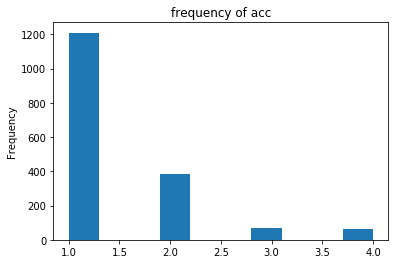

In [7]:
#ploting the frequency of the 'acceptability' of the car
#1 = unacc
#2 = acc
#3 = good
#4 = vgood
df_label.plot.hist()
plt.title('frequency of acc')

In [32]:
#ploting graph of each parameters vs the acceptability of car


Text(0,0.5,'ACC.')

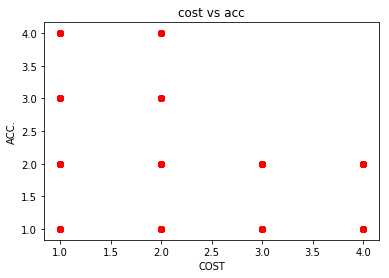

In [24]:
plt.scatter(df_features['COST'],df_label ,color='red', s=30)
plt.title('cost vs acc')
plt.xlabel("COST")
plt.ylabel("ACC.")


Text(0,0.5,'ACC.')

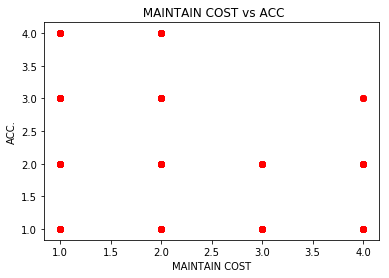

In [25]:
plt.scatter(df_label, df_features['MAINTAIN COST'] ,color='red', s=30)
plt.title(' MAINTAIN COST vs ACC')
plt.xlabel("MAINTAIN COST")
plt.ylabel("ACC.")



Text(0,0.5,'ACC.')

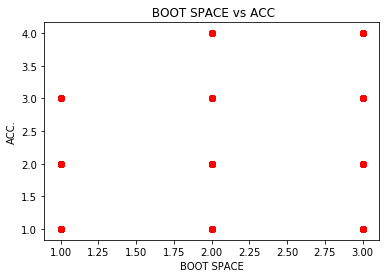

In [27]:
plt.scatter( df_features['BOOT SPACE'],df_label,color='red', s=30)
plt.title(' BOOT SPACE vs ACC')
plt.xlabel("BOOT SPACE")
plt.ylabel("ACC.")


Text(0,0.5,'ACC.')

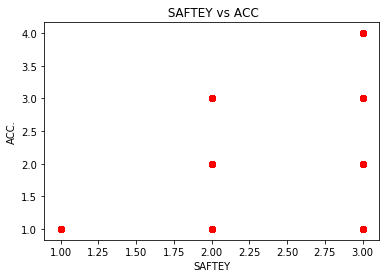

In [29]:
plt.scatter( df_features['SAFTEY'],df_label ,color='red', s=30)
plt.title(' SAFTEY vs ACC')
plt.xlabel("SAFTEY")
plt.ylabel("ACC.")


Text(0,0.5,'ACC.')

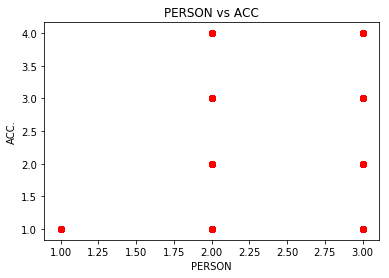

In [30]:
plt.scatter( df_features['PERSON'],df_label,color='red', s=30)
plt.title('PERSON vs ACC')
plt.xlabel("PERSON")
plt.ylabel("ACC.")

Text(0,0.5,'ACC.')

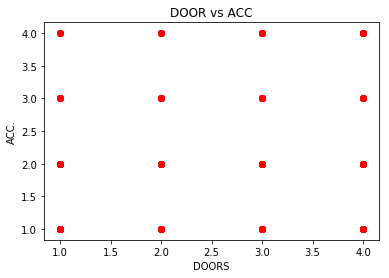

In [31]:
plt.scatter( df_features['DOORS'],df_label ,color='red', s=30)
plt.title('DOOR vs ACC')
plt.xlabel("DOORS")
plt.ylabel("ACC.")

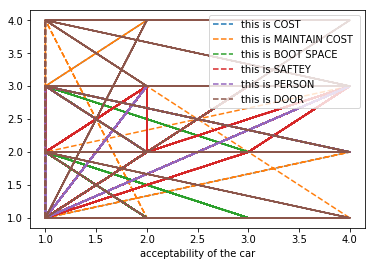

In [15]:
#graphs of all parameters vs acceptability

plt.plot(df_label, df_features['COST'], '--')
plt.plot(df_label, df_features['MAINTAIN COST'], '--')
plt.plot(df_label, df_features['BOOT SPACE'], '--')
plt.plot(df_label, df_features['SAFTEY'], '--')
plt.plot(df_label, df_features['PERSON'], '--')
plt.plot(df_label, df_features['DOORS'], '--')

plt.xlabel("acceptability of the car")
plt.legend(["this is COST","this is MAINTAIN COST ", "this is BOOT SPACE ", "this is SAFTEY", "this is PERSON", "this is DOOR"])

In [16]:
#TSNE of 'acceptability'

In [42]:
model = TSNE(learning_rate=100)

In [43]:
transformed = model.fit_transform(df_features)

In [44]:
x_axis = transformed[:, 0]
y_axis = transformed[:, 1]

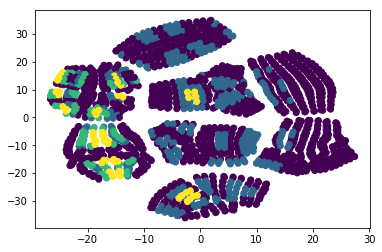

In [45]:
plt.scatter(x_axis, y_axis, c=df_label)
plt.show()


In [39]:
#converting the LABEL coloumn into by-4 MATRIX

print(df_label)
label2=[]
for lab in df_label:
    if lab == 1:
        label2.append([1,0,0,0])
    elif lab==2:
        label2.append([0,1,0,0])
    elif lab==3:
        label2.append([0,0,1,0])
    elif lab==4:
        label2.append([0,0,0,1])
print(label2)
label3 = np.array(label2)

0       1
1       1
2       1
3       1
4       1
5       1
6       1
7       1
8       1
9       1
10      1
11      1
12      1
13      1
14      1
15      1
16      1
17      1
18      1
19      1
20      1
21      1
22      1
23      1
24      1
25      1
26      1
27      1
28      1
29      1
       ..
1698    1
1699    3
1700    4
1701    1
1702    1
1703    1
1704    1
1705    1
1706    1
1707    1
1708    1
1709    1
1710    1
1711    2
1712    3
1713    1
1714    3
1715    4
1716    1
1717    3
1718    4
1719    1
1720    2
1721    3
1722    1
1723    3
1724    4
1725    1
1726    3
1727    4
Name: VALUE, Length: 1728, dtype: int64
[[1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0],

In [40]:
x_train, x_test, y_train, y_test = train_test_split(data, label3, test_size=0.3, random_state=42)
x_train.shape
print(x_test.shape)
y_test.shape


(519, 6)


(519, 4)

In [41]:
model2 = Sequential()
model2.add(Dense(500, input_dim = 6, activation = 'sigmoid'))
model2.add(Dense(300, activation='tanh' ))
model2.add(Dense(4, activation = 'softmax'))
model2.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
model2.fit(data, label3, epochs =1000, batch_size = 80, validation_data = (x_test,y_test))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Train on 1728 samples, validate on 519 samples
Epoch 1/1000
1728/1728 [==============================] - 0s 240us/step - loss: 0.1221 - acc: 0.6765 - val_loss: 0.1119 - val_acc: 0.6898
Epoch 2/1000
1728/1728 [==============================] - 0s 118us/step - loss: 0.1110 - acc: 0.7072 - val_loss: 0.1030 - val_acc: 0.6898
Epoch 3/1000
1728/1728 [==============================] - 0s 122us/step - loss: 0.1011 - acc: 0.7211 - val_loss: 0.1032 - val_acc: 0.7707
Epoch 4/1000
1728/1728 [==============================] - 0s 122us/step - loss: 0.0938 - acc: 0.7471 - val_loss: 0.0977 - val_acc: 0.6936
Epoch 5/1000
1728/1728 [==============================] - 0s 139us/step - loss: 0.0898 - acc: 0.7448 - val_loss: 0.0873 - val_acc: 0.7380
Epoch 6/1000
1728/1728 [==============================] - 0s 132us/step - loss: 0.0843 - acc: 0.7720 - val_loss: 0.0960 - val_acc: 0.7168
Epoch

Epoch 56/1000
1728/1728 [==============================] - 0s 127us/step - loss: 0.0668 - acc: 0.8038 - val_loss: 0.0677 - val_acc: 0.8073
Epoch 57/1000
1728/1728 [==============================] - 0s 136us/step - loss: 0.0702 - acc: 0.7980 - val_loss: 0.0664 - val_acc: 0.8092
Epoch 58/1000
1728/1728 [==============================] - 0s 149us/step - loss: 0.0668 - acc: 0.8079 - val_loss: 0.0660 - val_acc: 0.8208
Epoch 59/1000
1728/1728 [==============================] - 0s 127us/step - loss: 0.0661 - acc: 0.8148 - val_loss: 0.0709 - val_acc: 0.7958
Epoch 60/1000
1728/1728 [==============================] - 0s 143us/step - loss: 0.0670 - acc: 0.8096 - val_loss: 0.0665 - val_acc: 0.8112
Epoch 61/1000
1728/1728 [==============================] - 0s 135us/step - loss: 0.0673 - acc: 0.8113 - val_loss: 0.0651 - val_acc: 0.8247
Epoch 62/1000
1728/1728 [==============================] - 0s 124us/step - loss: 0.0658 - acc: 0.8171 - val_loss: 0.0641 - val_acc: 0.8227
Epoch 63/1000
1728/1728 [==

Epoch 115/1000
1728/1728 [==============================] - 0s 143us/step - loss: 0.0464 - acc: 0.8779 - val_loss: 0.0494 - val_acc: 0.8593
Epoch 116/1000
1728/1728 [==============================] - 0s 134us/step - loss: 0.0459 - acc: 0.8762 - val_loss: 0.0456 - val_acc: 0.8863
Epoch 117/1000
1728/1728 [==============================] - 0s 136us/step - loss: 0.0469 - acc: 0.8814 - val_loss: 0.0471 - val_acc: 0.8767
Epoch 118/1000
1728/1728 [==============================] - 0s 144us/step - loss: 0.0442 - acc: 0.8848 - val_loss: 0.0443 - val_acc: 0.8786
Epoch 119/1000
1728/1728 [==============================] - 0s 133us/step - loss: 0.0445 - acc: 0.8819 - val_loss: 0.0452 - val_acc: 0.8728
Epoch 120/1000
1728/1728 [==============================] - 0s 133us/step - loss: 0.0431 - acc: 0.8872 - val_loss: 0.0430 - val_acc: 0.8902
Epoch 121/1000
1728/1728 [==============================] - 0s 141us/step - loss: 0.0425 - acc: 0.8941 - val_loss: 0.0431 - val_acc: 0.8960
Epoch 122/1000
1728/

1728/1728 [==============================] - 0s 143us/step - loss: 0.0318 - acc: 0.9201 - val_loss: 0.0349 - val_acc: 0.9171
Epoch 174/1000
1728/1728 [==============================] - 0s 155us/step - loss: 0.0310 - acc: 0.9196 - val_loss: 0.0309 - val_acc: 0.9229
Epoch 175/1000
1728/1728 [==============================] - 0s 129us/step - loss: 0.0318 - acc: 0.9184 - val_loss: 0.0293 - val_acc: 0.9229
Epoch 176/1000
1728/1728 [==============================] - 0s 166us/step - loss: 0.0311 - acc: 0.9225 - val_loss: 0.0292 - val_acc: 0.9229
Epoch 177/1000
1728/1728 [==============================] - 0s 148us/step - loss: 0.0306 - acc: 0.9230 - val_loss: 0.0297 - val_acc: 0.9287
Epoch 178/1000
1728/1728 [==============================] - 0s 158us/step - loss: 0.0305 - acc: 0.9236 - val_loss: 0.0361 - val_acc: 0.8998
Epoch 179/1000
1728/1728 [==============================] - 0s 145us/step - loss: 0.0316 - acc: 0.9236 - val_loss: 0.0292 - val_acc: 0.9287
Epoch 180/1000
1728/1728 [=========

1728/1728 [==============================] - 0s 144us/step - loss: 0.0279 - acc: 0.9311 - val_loss: 0.0247 - val_acc: 0.9383
Epoch 232/1000
1728/1728 [==============================] - 0s 133us/step - loss: 0.0260 - acc: 0.9363 - val_loss: 0.0256 - val_acc: 0.9326
Epoch 233/1000
1728/1728 [==============================] - 0s 154us/step - loss: 0.0261 - acc: 0.9346 - val_loss: 0.0245 - val_acc: 0.9403
Epoch 234/1000
1728/1728 [==============================] - 0s 145us/step - loss: 0.0257 - acc: 0.9369 - val_loss: 0.0241 - val_acc: 0.9403
Epoch 235/1000
1728/1728 [==============================] - 0s 164us/step - loss: 0.0259 - acc: 0.9358 - val_loss: 0.0255 - val_acc: 0.9383
Epoch 236/1000
1728/1728 [==============================] - 0s 133us/step - loss: 0.0254 - acc: 0.9363 - val_loss: 0.0255 - val_acc: 0.9345
Epoch 237/1000
1728/1728 [==============================] - 0s 160us/step - loss: 0.0265 - acc: 0.9346 - val_loss: 0.0237 - val_acc: 0.9383
Epoch 238/1000
1728/1728 [=========

1728/1728 [==============================] - 0s 161us/step - loss: 0.0236 - acc: 0.9404 - val_loss: 0.0197 - val_acc: 0.9538
Epoch 290/1000
1728/1728 [==============================] - 0s 142us/step - loss: 0.0228 - acc: 0.9404 - val_loss: 0.0208 - val_acc: 0.9480
Epoch 291/1000
1728/1728 [==============================] - 0s 159us/step - loss: 0.0238 - acc: 0.9392 - val_loss: 0.0202 - val_acc: 0.9518
Epoch 292/1000
1728/1728 [==============================] - 0s 156us/step - loss: 0.0237 - acc: 0.9392 - val_loss: 0.0225 - val_acc: 0.9422
Epoch 293/1000
1728/1728 [==============================] - 0s 168us/step - loss: 0.0228 - acc: 0.9433 - val_loss: 0.0214 - val_acc: 0.9422
Epoch 294/1000
1728/1728 [==============================] - 0s 147us/step - loss: 0.0226 - acc: 0.9427 - val_loss: 0.0200 - val_acc: 0.9576
Epoch 295/1000
1728/1728 [==============================] - 0s 155us/step - loss: 0.0222 - acc: 0.9473 - val_loss: 0.0194 - val_acc: 0.9518
Epoch 296/1000
1728/1728 [=========

1728/1728 [==============================] - 0s 140us/step - loss: 0.0194 - acc: 0.9514 - val_loss: 0.0170 - val_acc: 0.9576
Epoch 348/1000
1728/1728 [==============================] - 0s 139us/step - loss: 0.0192 - acc: 0.9508 - val_loss: 0.0168 - val_acc: 0.9557
Epoch 349/1000
1728/1728 [==============================] - 0s 155us/step - loss: 0.0190 - acc: 0.9531 - val_loss: 0.0181 - val_acc: 0.9595
Epoch 350/1000
1728/1728 [==============================] - 0s 158us/step - loss: 0.0213 - acc: 0.9439 - val_loss: 0.0197 - val_acc: 0.9441
Epoch 351/1000
1728/1728 [==============================] - 0s 155us/step - loss: 0.0192 - acc: 0.9497 - val_loss: 0.0167 - val_acc: 0.9595
Epoch 352/1000
1728/1728 [==============================] - 0s 153us/step - loss: 0.0186 - acc: 0.9531 - val_loss: 0.0165 - val_acc: 0.9615
Epoch 353/1000
1728/1728 [==============================] - 0s 153us/step - loss: 0.0192 - acc: 0.9502 - val_loss: 0.0164 - val_acc: 0.9595
Epoch 354/1000
1728/1728 [=========

1728/1728 [==============================] - 0s 156us/step - loss: 0.0163 - acc: 0.9578 - val_loss: 0.0147 - val_acc: 0.9634
Epoch 406/1000
1728/1728 [==============================] - 0s 168us/step - loss: 0.0170 - acc: 0.9554 - val_loss: 0.0156 - val_acc: 0.9615
Epoch 407/1000
1728/1728 [==============================] - 0s 151us/step - loss: 0.0169 - acc: 0.9572 - val_loss: 0.0159 - val_acc: 0.9576
Epoch 408/1000
1728/1728 [==============================] - 0s 161us/step - loss: 0.0170 - acc: 0.9554 - val_loss: 0.0181 - val_acc: 0.9518
Epoch 409/1000
1728/1728 [==============================] - 0s 160us/step - loss: 0.0169 - acc: 0.9549 - val_loss: 0.0154 - val_acc: 0.9615
Epoch 410/1000
1728/1728 [==============================] - 0s 158us/step - loss: 0.0158 - acc: 0.9589 - val_loss: 0.0142 - val_acc: 0.9634
Epoch 411/1000
1728/1728 [==============================] - 0s 152us/step - loss: 0.0159 - acc: 0.9601 - val_loss: 0.0146 - val_acc: 0.9634
Epoch 412/1000
1728/1728 [=========

1728/1728 [==============================] - 0s 155us/step - loss: 0.0050 - acc: 0.9878 - val_loss: 0.0026 - val_acc: 0.9942
Epoch 464/1000
1728/1728 [==============================] - 0s 164us/step - loss: 0.0035 - acc: 0.9919 - val_loss: 0.0040 - val_acc: 0.9904
Epoch 465/1000
1728/1728 [==============================] - 0s 163us/step - loss: 0.0019 - acc: 0.9977 - val_loss: 0.0014 - val_acc: 1.0000
Epoch 466/1000
1728/1728 [==============================] - 0s 153us/step - loss: 0.0018 - acc: 0.9971 - val_loss: 0.0032 - val_acc: 0.9942
Epoch 467/1000
1728/1728 [==============================] - 0s 156us/step - loss: 0.0022 - acc: 0.9959 - val_loss: 0.0029 - val_acc: 0.9942
Epoch 468/1000
1728/1728 [==============================] - 0s 145us/step - loss: 0.0019 - acc: 0.9977 - val_loss: 0.0011 - val_acc: 1.0000
Epoch 469/1000
1728/1728 [==============================] - 0s 157us/step - loss: 0.0013 - acc: 1.0000 - val_loss: 0.0022 - val_acc: 0.9942
Epoch 470/1000
1728/1728 [=========

1728/1728 [==============================] - 0s 166us/step - loss: 3.5547e-04 - acc: 1.0000 - val_loss: 4.4994e-04 - val_acc: 1.0000
Epoch 520/1000
1728/1728 [==============================] - 0s 148us/step - loss: 4.1517e-04 - acc: 1.0000 - val_loss: 3.4472e-04 - val_acc: 1.0000
Epoch 521/1000
1728/1728 [==============================] - 0s 163us/step - loss: 5.6238e-04 - acc: 0.9994 - val_loss: 8.0229e-04 - val_acc: 0.9981
Epoch 522/1000
1728/1728 [==============================] - 0s 148us/step - loss: 0.0014 - acc: 0.9965 - val_loss: 0.0037 - val_acc: 0.9904
Epoch 523/1000
1728/1728 [==============================] - 0s 159us/step - loss: 7.1198e-04 - acc: 0.9994 - val_loss: 5.7032e-04 - val_acc: 1.0000
Epoch 524/1000
1728/1728 [==============================] - 0s 163us/step - loss: 6.7778e-04 - acc: 0.9994 - val_loss: 5.2148e-04 - val_acc: 1.0000
Epoch 525/1000
1728/1728 [==============================] - 0s 162us/step - loss: 9.3298e-04 - acc: 0.9977 - val_loss: 0.0012 - val_acc

1728/1728 [==============================] - 0s 142us/step - loss: 0.0012 - acc: 0.9988 - val_loss: 0.0010 - val_acc: 0.9981
Epoch 575/1000
1728/1728 [==============================] - 0s 153us/step - loss: 8.2054e-04 - acc: 0.9988 - val_loss: 0.0013 - val_acc: 0.9981
Epoch 576/1000
1728/1728 [==============================] - 0s 143us/step - loss: 6.1568e-04 - acc: 0.9994 - val_loss: 5.1922e-04 - val_acc: 1.0000
Epoch 577/1000
1728/1728 [==============================] - 0s 155us/step - loss: 4.1101e-04 - acc: 1.0000 - val_loss: 4.9468e-04 - val_acc: 1.0000
Epoch 578/1000
1728/1728 [==============================] - 0s 173us/step - loss: 2.7842e-04 - acc: 1.0000 - val_loss: 1.7074e-04 - val_acc: 1.0000
Epoch 579/1000
1728/1728 [==============================] - 0s 147us/step - loss: 1.9379e-04 - acc: 1.0000 - val_loss: 2.2902e-04 - val_acc: 1.0000
Epoch 580/1000
1728/1728 [==============================] - 0s 174us/step - loss: 1.6965e-04 - acc: 1.0000 - val_loss: 1.4742e-04 - val_acc

1728/1728 [==============================] - 0s 144us/step - loss: 7.3174e-05 - acc: 1.0000 - val_loss: 9.3600e-05 - val_acc: 1.0000
Epoch 630/1000
1728/1728 [==============================] - 0s 149us/step - loss: 1.0075e-04 - acc: 1.0000 - val_loss: 1.8798e-04 - val_acc: 1.0000
Epoch 631/1000
1728/1728 [==============================] - 0s 158us/step - loss: 1.2485e-04 - acc: 1.0000 - val_loss: 9.1762e-05 - val_acc: 1.0000
Epoch 632/1000
1728/1728 [==============================] - 0s 151us/step - loss: 1.1376e-04 - acc: 1.0000 - val_loss: 2.2360e-04 - val_acc: 1.0000
Epoch 633/1000
1728/1728 [==============================] - 0s 144us/step - loss: 1.4131e-04 - acc: 1.0000 - val_loss: 6.8007e-05 - val_acc: 1.0000
Epoch 634/1000
1728/1728 [==============================] - 0s 164us/step - loss: 1.8800e-04 - acc: 1.0000 - val_loss: 9.2370e-05 - val_acc: 1.0000
Epoch 635/1000
1728/1728 [==============================] - 0s 188us/step - loss: 2.8770e-04 - acc: 1.0000 - val_loss: 0.0012 -

Epoch 685/1000
1728/1728 [==============================] - 0s 174us/step - loss: 3.8872e-05 - acc: 1.0000 - val_loss: 3.8021e-05 - val_acc: 1.0000
Epoch 686/1000
1728/1728 [==============================] - 0s 174us/step - loss: 3.9065e-05 - acc: 1.0000 - val_loss: 3.8327e-05 - val_acc: 1.0000
Epoch 687/1000
1728/1728 [==============================] - 0s 161us/step - loss: 3.9105e-05 - acc: 1.0000 - val_loss: 3.7997e-05 - val_acc: 1.0000
Epoch 688/1000
1728/1728 [==============================] - 0s 174us/step - loss: 3.8700e-05 - acc: 1.0000 - val_loss: 3.6789e-05 - val_acc: 1.0000
Epoch 689/1000
1728/1728 [==============================] - 0s 163us/step - loss: 4.0105e-05 - acc: 1.0000 - val_loss: 3.6751e-05 - val_acc: 1.0000
Epoch 690/1000
1728/1728 [==============================] - 0s 173us/step - loss: 3.8947e-05 - acc: 1.0000 - val_loss: 3.7850e-05 - val_acc: 1.0000
Epoch 691/1000
1728/1728 [==============================] - 0s 159us/step - loss: 3.9443e-05 - acc: 1.0000 - val

1728/1728 [==============================] - 0s 166us/step - loss: 2.7752e-05 - acc: 1.0000 - val_loss: 2.3317e-05 - val_acc: 1.0000
Epoch 741/1000
1728/1728 [==============================] - 0s 173us/step - loss: 2.5451e-05 - acc: 1.0000 - val_loss: 2.3471e-05 - val_acc: 1.0000
Epoch 742/1000
1728/1728 [==============================] - 0s 169us/step - loss: 2.6633e-05 - acc: 1.0000 - val_loss: 2.4738e-05 - val_acc: 1.0000
Epoch 743/1000
1728/1728 [==============================] - 0s 180us/step - loss: 2.5348e-05 - acc: 1.0000 - val_loss: 2.7435e-05 - val_acc: 1.0000
Epoch 744/1000
1728/1728 [==============================] - 0s 162us/step - loss: 2.8042e-05 - acc: 1.0000 - val_loss: 2.3449e-05 - val_acc: 1.0000
Epoch 745/1000
1728/1728 [==============================] - 0s 174us/step - loss: 2.5207e-05 - acc: 1.0000 - val_loss: 2.3324e-05 - val_acc: 1.0000
Epoch 746/1000
1728/1728 [==============================] - 0s 186us/step - loss: 2.5377e-05 - acc: 1.0000 - val_loss: 2.7186e-

Epoch 796/1000
1728/1728 [==============================] - 0s 152us/step - loss: 1.2492e-04 - acc: 1.0000 - val_loss: 1.1476e-04 - val_acc: 1.0000
Epoch 797/1000
1728/1728 [==============================] - 0s 149us/step - loss: 9.8133e-05 - acc: 1.0000 - val_loss: 7.6858e-05 - val_acc: 1.0000
Epoch 798/1000
1728/1728 [==============================] - 0s 166us/step - loss: 5.3685e-05 - acc: 1.0000 - val_loss: 4.4313e-05 - val_acc: 1.0000
Epoch 799/1000
1728/1728 [==============================] - 0s 160us/step - loss: 3.6341e-05 - acc: 1.0000 - val_loss: 3.3446e-05 - val_acc: 1.0000
Epoch 800/1000
1728/1728 [==============================] - 0s 156us/step - loss: 3.3974e-05 - acc: 1.0000 - val_loss: 3.2121e-05 - val_acc: 1.0000
Epoch 801/1000
1728/1728 [==============================] - 0s 162us/step - loss: 3.1842e-05 - acc: 1.0000 - val_loss: 3.0885e-05 - val_acc: 1.0000
Epoch 802/1000
1728/1728 [==============================] - 0s 174us/step - loss: 3.0712e-05 - acc: 1.0000 - val

1728/1728 [==============================] - 0s 167us/step - loss: 1.6410e-05 - acc: 1.0000 - val_loss: 1.5214e-05 - val_acc: 1.0000: 0s - loss: 1.6246e-05 - acc: 1.000
Epoch 852/1000
1728/1728 [==============================] - 0s 152us/step - loss: 1.6142e-05 - acc: 1.0000 - val_loss: 1.5061e-05 - val_acc: 1.0000
Epoch 853/1000
1728/1728 [==============================] - 0s 161us/step - loss: 1.6444e-05 - acc: 1.0000 - val_loss: 1.5127e-05 - val_acc: 1.0000
Epoch 854/1000
1728/1728 [==============================] - 0s 163us/step - loss: 1.6237e-05 - acc: 1.0000 - val_loss: 1.4946e-05 - val_acc: 1.0000
Epoch 855/1000
1728/1728 [==============================] - 0s 162us/step - loss: 1.5817e-05 - acc: 1.0000 - val_loss: 1.4705e-05 - val_acc: 1.0000
Epoch 856/1000
1728/1728 [==============================] - 0s 155us/step - loss: 1.5797e-05 - acc: 1.0000 - val_loss: 1.4910e-05 - val_acc: 1.0000
Epoch 857/1000
1728/1728 [==============================] - 0s 162us/step - loss: 1.5693e-0

1728/1728 [==============================] - 0s 164us/step - loss: 1.2581e-05 - acc: 1.0000 - val_loss: 1.1603e-05 - val_acc: 1.0000
Epoch 907/1000
1728/1728 [==============================] - 0s 181us/step - loss: 1.2526e-05 - acc: 1.0000 - val_loss: 1.0751e-05 - val_acc: 1.0000
Epoch 908/1000
1728/1728 [==============================] - 0s 169us/step - loss: 1.2092e-05 - acc: 1.0000 - val_loss: 1.0607e-05 - val_acc: 1.0000
Epoch 909/1000
1728/1728 [==============================] - 0s 165us/step - loss: 1.1996e-05 - acc: 1.0000 - val_loss: 1.0242e-05 - val_acc: 1.0000
Epoch 910/1000
1728/1728 [==============================] - 0s 160us/step - loss: 1.1551e-05 - acc: 1.0000 - val_loss: 1.0262e-05 - val_acc: 1.0000
Epoch 911/1000
1728/1728 [==============================] - 0s 162us/step - loss: 1.1569e-05 - acc: 1.0000 - val_loss: 1.0294e-05 - val_acc: 1.0000
Epoch 912/1000
1728/1728 [==============================] - 0s 186us/step - loss: 1.1682e-05 - acc: 1.0000 - val_loss: 1.0095e-

1728/1728 [==============================] - 0s 169us/step - loss: 8.8210e-06 - acc: 1.0000 - val_loss: 7.2968e-06 - val_acc: 1.0000
Epoch 962/1000
1728/1728 [==============================] - 0s 159us/step - loss: 8.4408e-06 - acc: 1.0000 - val_loss: 7.4853e-06 - val_acc: 1.0000
Epoch 963/1000
1728/1728 [==============================] - 0s 160us/step - loss: 8.7458e-06 - acc: 1.0000 - val_loss: 7.8123e-06 - val_acc: 1.0000
Epoch 964/1000
1728/1728 [==============================] - 0s 157us/step - loss: 8.5454e-06 - acc: 1.0000 - val_loss: 7.3138e-06 - val_acc: 1.0000
Epoch 965/1000
1728/1728 [==============================] - 0s 173us/step - loss: 8.6325e-06 - acc: 1.0000 - val_loss: 7.3029e-06 - val_acc: 1.0000
Epoch 966/1000
1728/1728 [==============================] - 0s 154us/step - loss: 8.3523e-06 - acc: 1.0000 - val_loss: 6.8700e-06 - val_acc: 1.0000
Epoch 967/1000
1728/1728 [==============================] - 0s 191us/step - loss: 8.3707e-06 - acc: 1.0000 - val_loss: 6.9705e-

In [45]:
#COST	MAINTAIN COST	DOORS	PERSON	BOOT SPACE	SAFTEY	VALUE



a=input("enter COST \n1- low \n2- med \n3- high \n4- vhigh \n: ")
if a=="low":
    a=1
elif a=="med":
    a=2
elif a=="high":
    a=3
elif a=="vhigh":
    a=4

    







b=input("enter MAINTAIN COST \n1- low \n2- med \n3- high \n4- vhigh \n: ")
if b=="low":
    b=1
elif b=="med":
    b=2
elif b=="high":
    b=3
elif b=="vhigh":
    b=4







c=input("enter DOORS \n1- 2 \n2- 3 \n3- 4 \n4- more \n:")
if c==2:
    c=1
elif c==3:
    c=2
elif c==4:
    c=3
elif c=="more":
    c=4








d=input("enter PERSON \n1- 2 \n2- 4 \n3- more \n: ")
if d==2:
    d=1
elif d==4:
    d=2
elif d=="more":
    d=3







e=input("enter BOOT SPACE \n1- small \n2- med \n3- big \n: ")
if e=="small":
    e=1
elif e=="med":
    e=2
elif e=="big":
    e=3









f=input("enter SAFTEY \n1- low \n2- med \n3- high \n: ")
if f=="low":
    f=1
elif f=="med":
    f=2
elif f=="high":
    f=3



feature_try = np.array([[a,b,c,d,e,f]])
result = model2.predict_classes(feature_try)

enter COST 
1- low 
2- med 
3- high 
4- vhigh 
: low
enter MAINTAIN COST 
1- low 
2- med 
3- high 
4- vhigh 
: high
enter DOORS 
1- 2 
2- 3 
3- 4 
4- more 
:3
enter PERSON 
1- 2 
2- 4 
3- more 
: more
enter BOOT SPACE 
1- small 
2- med 
3- big 
: big
enter SAFTEY 
1- low 
2- med 
3- high 
: high


In [46]:
#for data no.1459 i.e.  low,high,3,more,big,high--vgood
#1 ,3 ,2 ,3 ,3 ,3

if result==0:
    print("unacc")
elif result==1:
    print("acc")
elif result==2:
    print("good")
elif result==3:
    print("vgood")
    


vgood
